<a id="import"></a>
# <a style="font-family:calibri; color:red; font-size:150%; text-align:left">Import Libraries</body>


In [48]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

<a id="read"></a>
# <a style="font-family:calibri; color:red; font-size:150%; text-align:left;"> Load Dataset</a>

In [49]:
df = pd.read_csv("C:/Users/840 G3/Documents/CPN Pro/loan default prediction model - ds2/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [74]:
df['income'] 

0          1740.0
1          4980.0
2          9480.0
3         11880.0
4         10440.0
           ...   
148665     7860.0
148666     7140.0
148667     6900.0
148668     7140.0
148669     7260.0
Name: income, Length: 148670, dtype: float64

<a id="basic"></a>
# </span><span style='color:red'> Dataset Description </span></b>

In [50]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10


# <span style='color:red'> Data Preprocessing </span></b>

In [51]:
# Select object columns
object_cols = df.select_dtypes(include=['object'])

# Create a LabelEncoder object
le = LabelEncoder()


# Fit and transform each object column
for col in object_cols:
    #if col != 'ID':
        df[f"{col}_Encoded"] = le.fit_transform(df[col])
        print(f"Labels for {col}:")
        for i, label in enumerate(le.classes_):
            print(f"{label}: {i}")
        print()

# Drop the original object columns
df = df.drop(object_cols, axis=1)


Labels for loan_limit:
cf: 0
ncf: 1
nan: 2

Labels for Gender:
Female: 0
Joint: 1
Male: 2
Sex Not Available: 3

Labels for approv_in_adv:
nopre: 0
pre: 1
nan: 2

Labels for loan_type:
type1: 0
type2: 1
type3: 2

Labels for loan_purpose:
p1: 0
p2: 1
p3: 2
p4: 3
nan: 4

Labels for Credit_Worthiness:
l1: 0
l2: 1

Labels for open_credit:
nopc: 0
opc: 1

Labels for business_or_commercial:
b/c: 0
nob/c: 1

Labels for Neg_ammortization:
neg_amm: 0
not_neg: 1
nan: 2

Labels for interest_only:
int_only: 0
not_int: 1

Labels for lump_sum_payment:
lpsm: 0
not_lpsm: 1

Labels for construction_type:
mh: 0
sb: 1

Labels for occupancy_type:
ir: 0
pr: 1
sr: 2

Labels for Secured_by:
home: 0
land: 1

Labels for total_units:
1U: 0
2U: 1
3U: 2
4U: 3

Labels for credit_type:
CIB: 0
CRIF: 1
EQUI: 2
EXP: 3

Labels for co-applicant_credit_type:
CIB: 0
EXP: 1

Labels for age:
25-34: 0
35-44: 1
45-54: 2
55-64: 3
65-74: 4
<25: 5
>74: 6
nan: 7

Labels for submission_of_application:
not_inst: 0
to_inst: 1
nan: 2


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 148670 non-null  int64  
 1   year                               148670 non-null  int64  
 2   loan_amount                        148670 non-null  int64  
 3   rate_of_interest                   112231 non-null  float64
 4   Interest_rate_spread               112031 non-null  float64
 5   Upfront_charges                    109028 non-null  float64
 6   term                               148629 non-null  float64
 7   property_value                     133572 non-null  float64
 8   income                             139520 non-null  float64
 9   Credit_Score                       148670 non-null  int64  
 10  LTV                                133572 non-null  float64
 11  Status                             1486

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 148670 non-null  int64  
 1   year                               148670 non-null  int64  
 2   loan_amount                        148670 non-null  int64  
 3   rate_of_interest                   112231 non-null  float64
 4   Interest_rate_spread               112031 non-null  float64
 5   Upfront_charges                    109028 non-null  float64
 6   term                               148629 non-null  float64
 7   property_value                     133572 non-null  float64
 8   income                             139520 non-null  float64
 9   Credit_Score                       148670 non-null  int64  
 10  LTV                                133572 non-null  float64
 11  Status                             1486

In [54]:
#showing features with NaN 

nan_features = df.columns[df.isnull().any()].tolist()

print(nan_features)

['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']


In [55]:
non_missing_count1 = df['rate_of_interest'].count()
print(non_missing_count1)

non_missing_count2 = df['Interest_rate_spread'].count()
print(non_missing_count2)

non_missing_count3 = df['Upfront_charges'].count()
print(non_missing_count3)

non_missing_count4 = df['term'].count()
print(non_missing_count4)

non_missing_count5 = df['property_value'].count()
print(non_missing_count5)

non_missing_count6 = df['income'].count()
print(non_missing_count6)


non_missing_count7 = df['LTV'].count()
print(non_missing_count7)


non_missing_count8 = df['dtir1'].count()
print(non_missing_count8)



112231
112031
109028
148629
133572
139520
133572
124549


In [56]:
# Print the number of NaN values before treatment
print("NaN values before treatment:")
print(df[nan_features].isnull().sum())

NaN values before treatment:
rate_of_interest        36439
Interest_rate_spread    36639
Upfront_charges         39642
term                       41
property_value          15098
income                   9150
LTV                     15098
dtir1                   24121
dtype: int64


In [57]:
#treating missing values with Mean Imputation technique using Simple Imputer 

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df[nan_features] = imputer.fit_transform(df[nan_features])

In [58]:
# Print the number of NaN values after treatment
print("\nNaN values after treatment:")
print(df[nan_features].isnull().sum())


NaN values after treatment:
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
LTV                     0
dtir1                   0
dtype: int64


In [59]:
nan_features2 = df.columns[df.isnull().any()].tolist()

print(nan_features2)

[]


In [60]:
df.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,construction_type_Encoded,occupancy_type_Encoded,Secured_by_Encoded,total_units_Encoded,credit_type_Encoded,co-applicant_credit_type_Encoded,age_Encoded,submission_of_application_Encoded,Region_Encoded,Security_Type_Encoded
0,24890,2019,116500,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,...,1,1,0,0,3,0,0,1,3,1
1,24891,2019,206500,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,...,1,1,0,0,2,1,3,1,0,1
2,24892,2019,406500,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,...,1,1,0,0,3,0,1,1,3,1
3,24893,2019,456500,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587,...,1,1,0,0,3,0,2,0,0,1
4,24894,2019,696500,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,...,1,1,0,0,1,1,0,0,0,1


<a id="num_statistics"></a>
# <span style='color:red'> Exploratory Data Analysis </span></b>

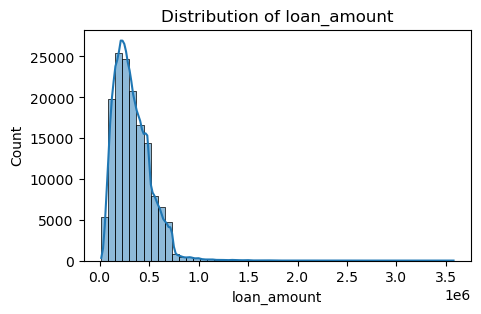

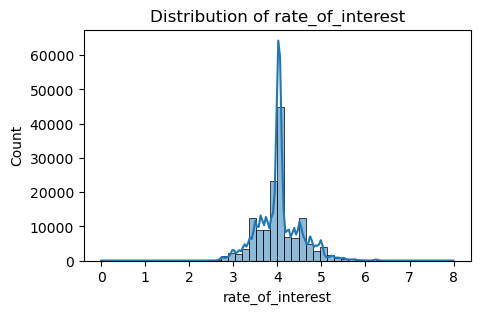

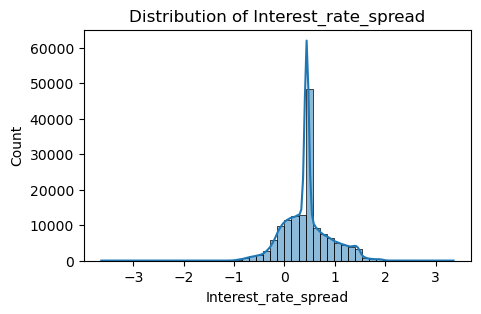

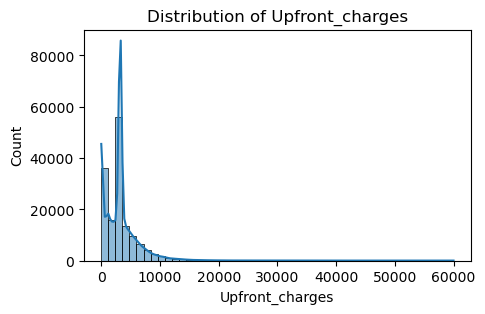

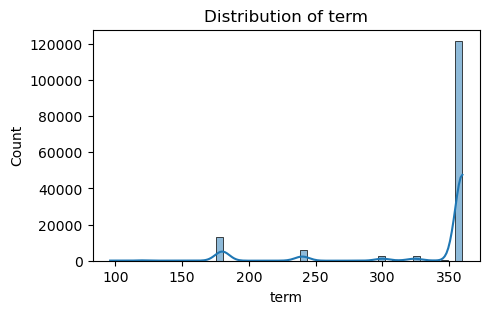

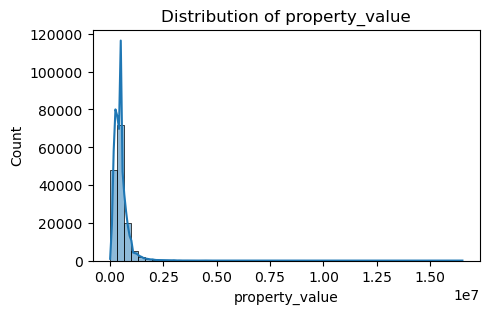

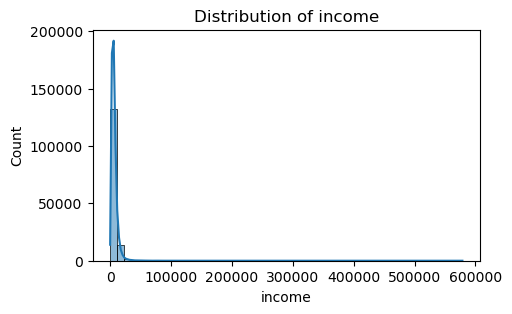

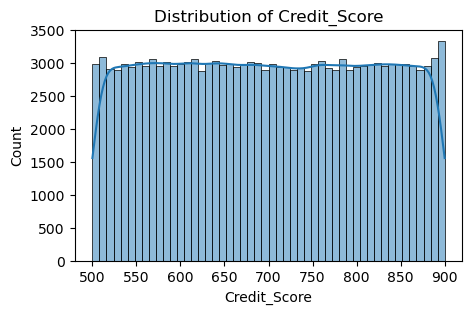

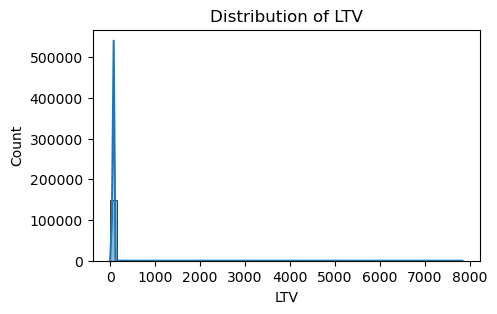

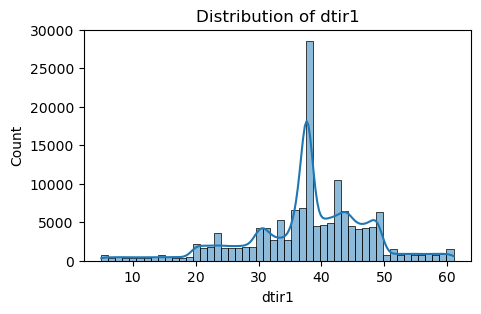

In [61]:
# Histograms for numeric features
numeric_features = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 
                     'term', 'property_value', 'income', 
                     'Credit_Score', 'LTV', 'dtir1']

for feature in numeric_features:
    plt.figure(figsize=(5,3))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



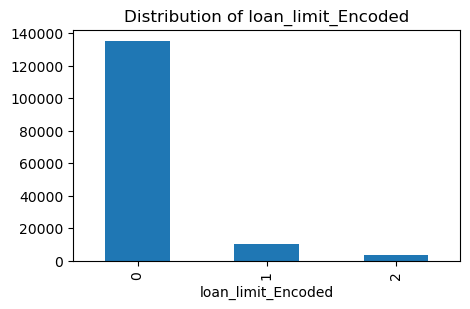

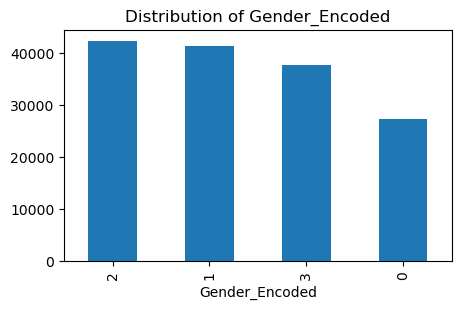

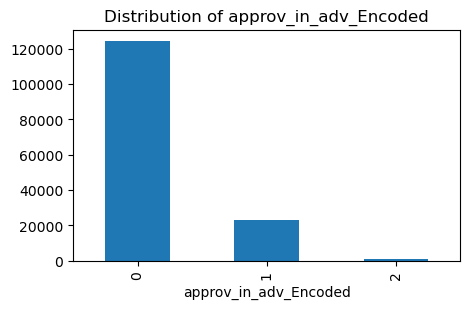

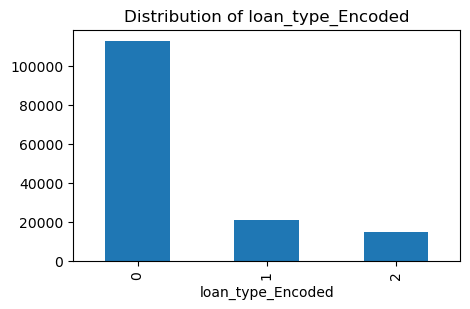

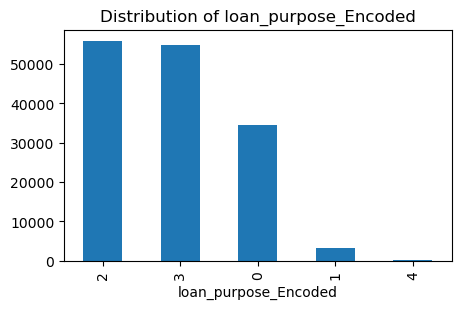

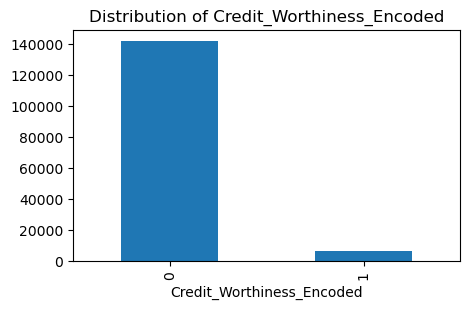

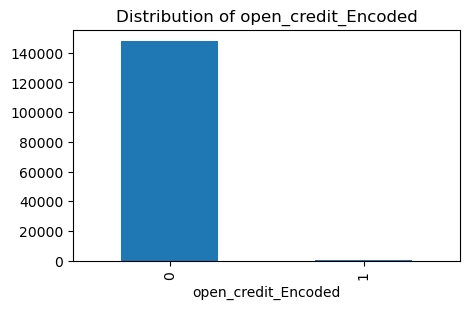

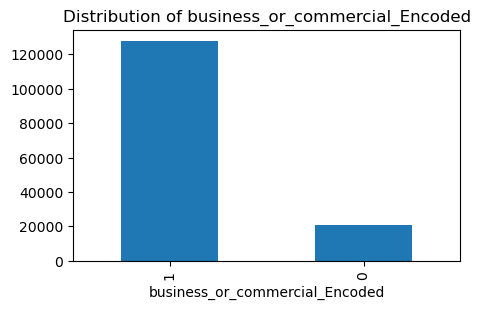

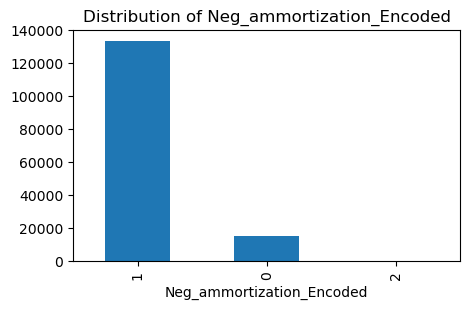

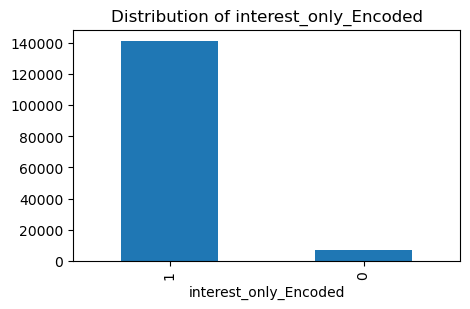

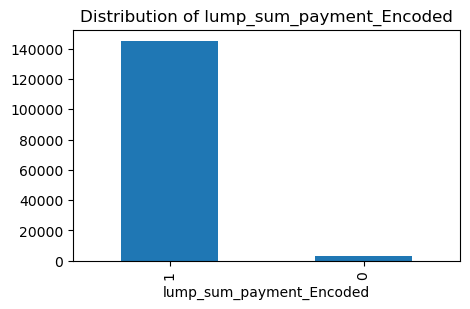

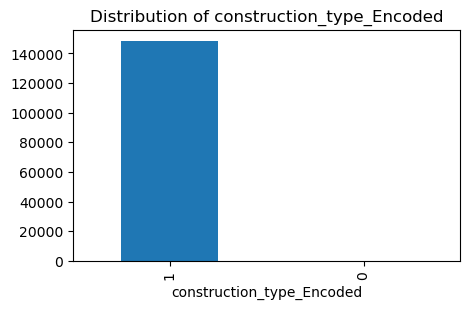

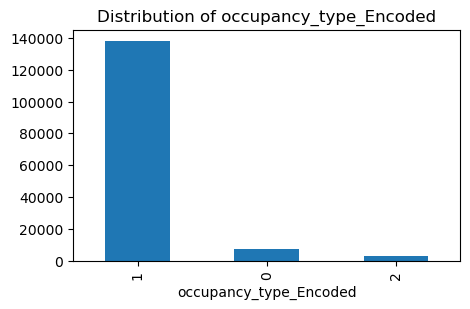

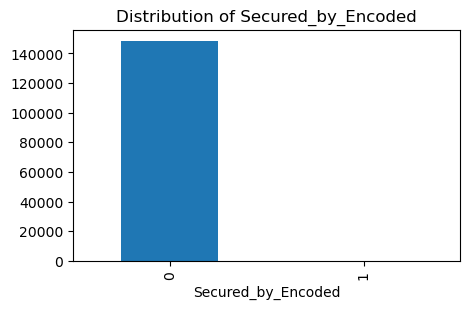

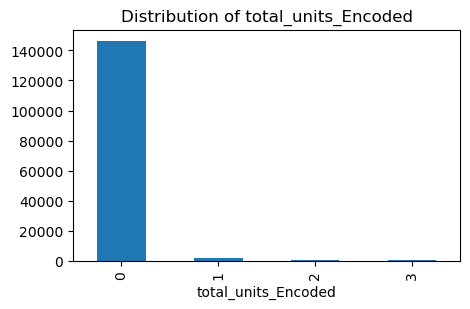

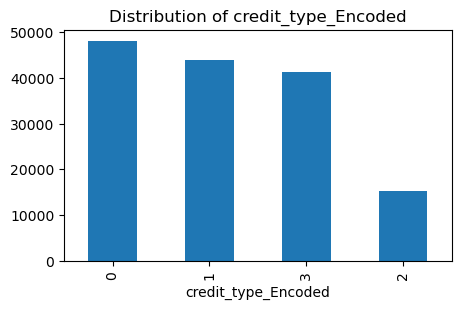

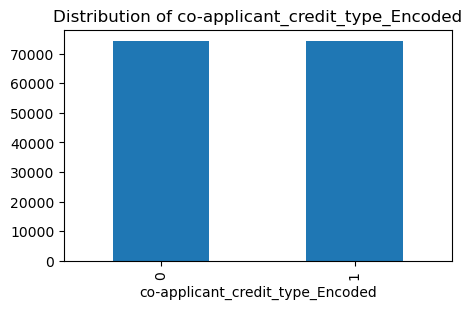

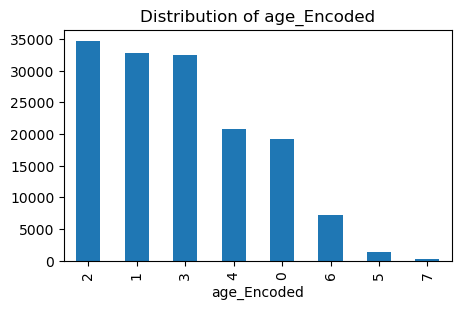

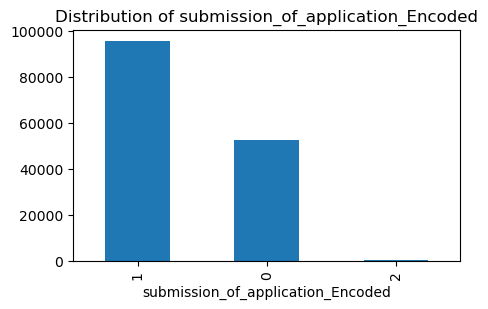

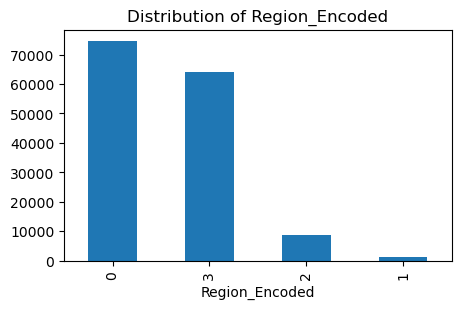

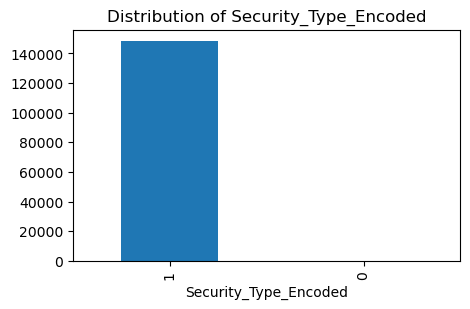

In [62]:
# Bar plots for categorical features
categorical_features = ['loan_limit_Encoded', 'Gender_Encoded', 'approv_in_adv_Encoded', 
                          'loan_type_Encoded', 'loan_purpose_Encoded', 'Credit_Worthiness_Encoded', 
                          'open_credit_Encoded', 'business_or_commercial_Encoded', 'Neg_ammortization_Encoded', 
                        'interest_only_Encoded', 'lump_sum_payment_Encoded', 'construction_type_Encoded', 'occupancy_type_Encoded',
                       'Secured_by_Encoded', 'total_units_Encoded', 'credit_type_Encoded', 'co-applicant_credit_type_Encoded', 'age_Encoded',
                       'submission_of_application_Encoded', 'Region_Encoded', 'Security_Type_Encoded']

for feature in categorical_features:
    plt.figure(figsize=(5,3))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.show()

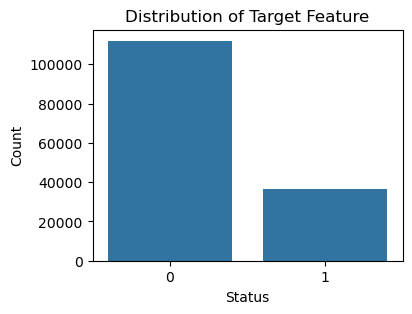

Percentage of each class:
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


In [63]:
# Check the distribution of the target variable
plt.figure(figsize=(4,3))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Target Feature')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Print the percentage of each class
print("Percentage of each class:")
print(df['Status'].value_counts(normalize=True) * 100)

<a id="num_statistics"></a>
# <span style='color:red'> Feature Selection </span></b>

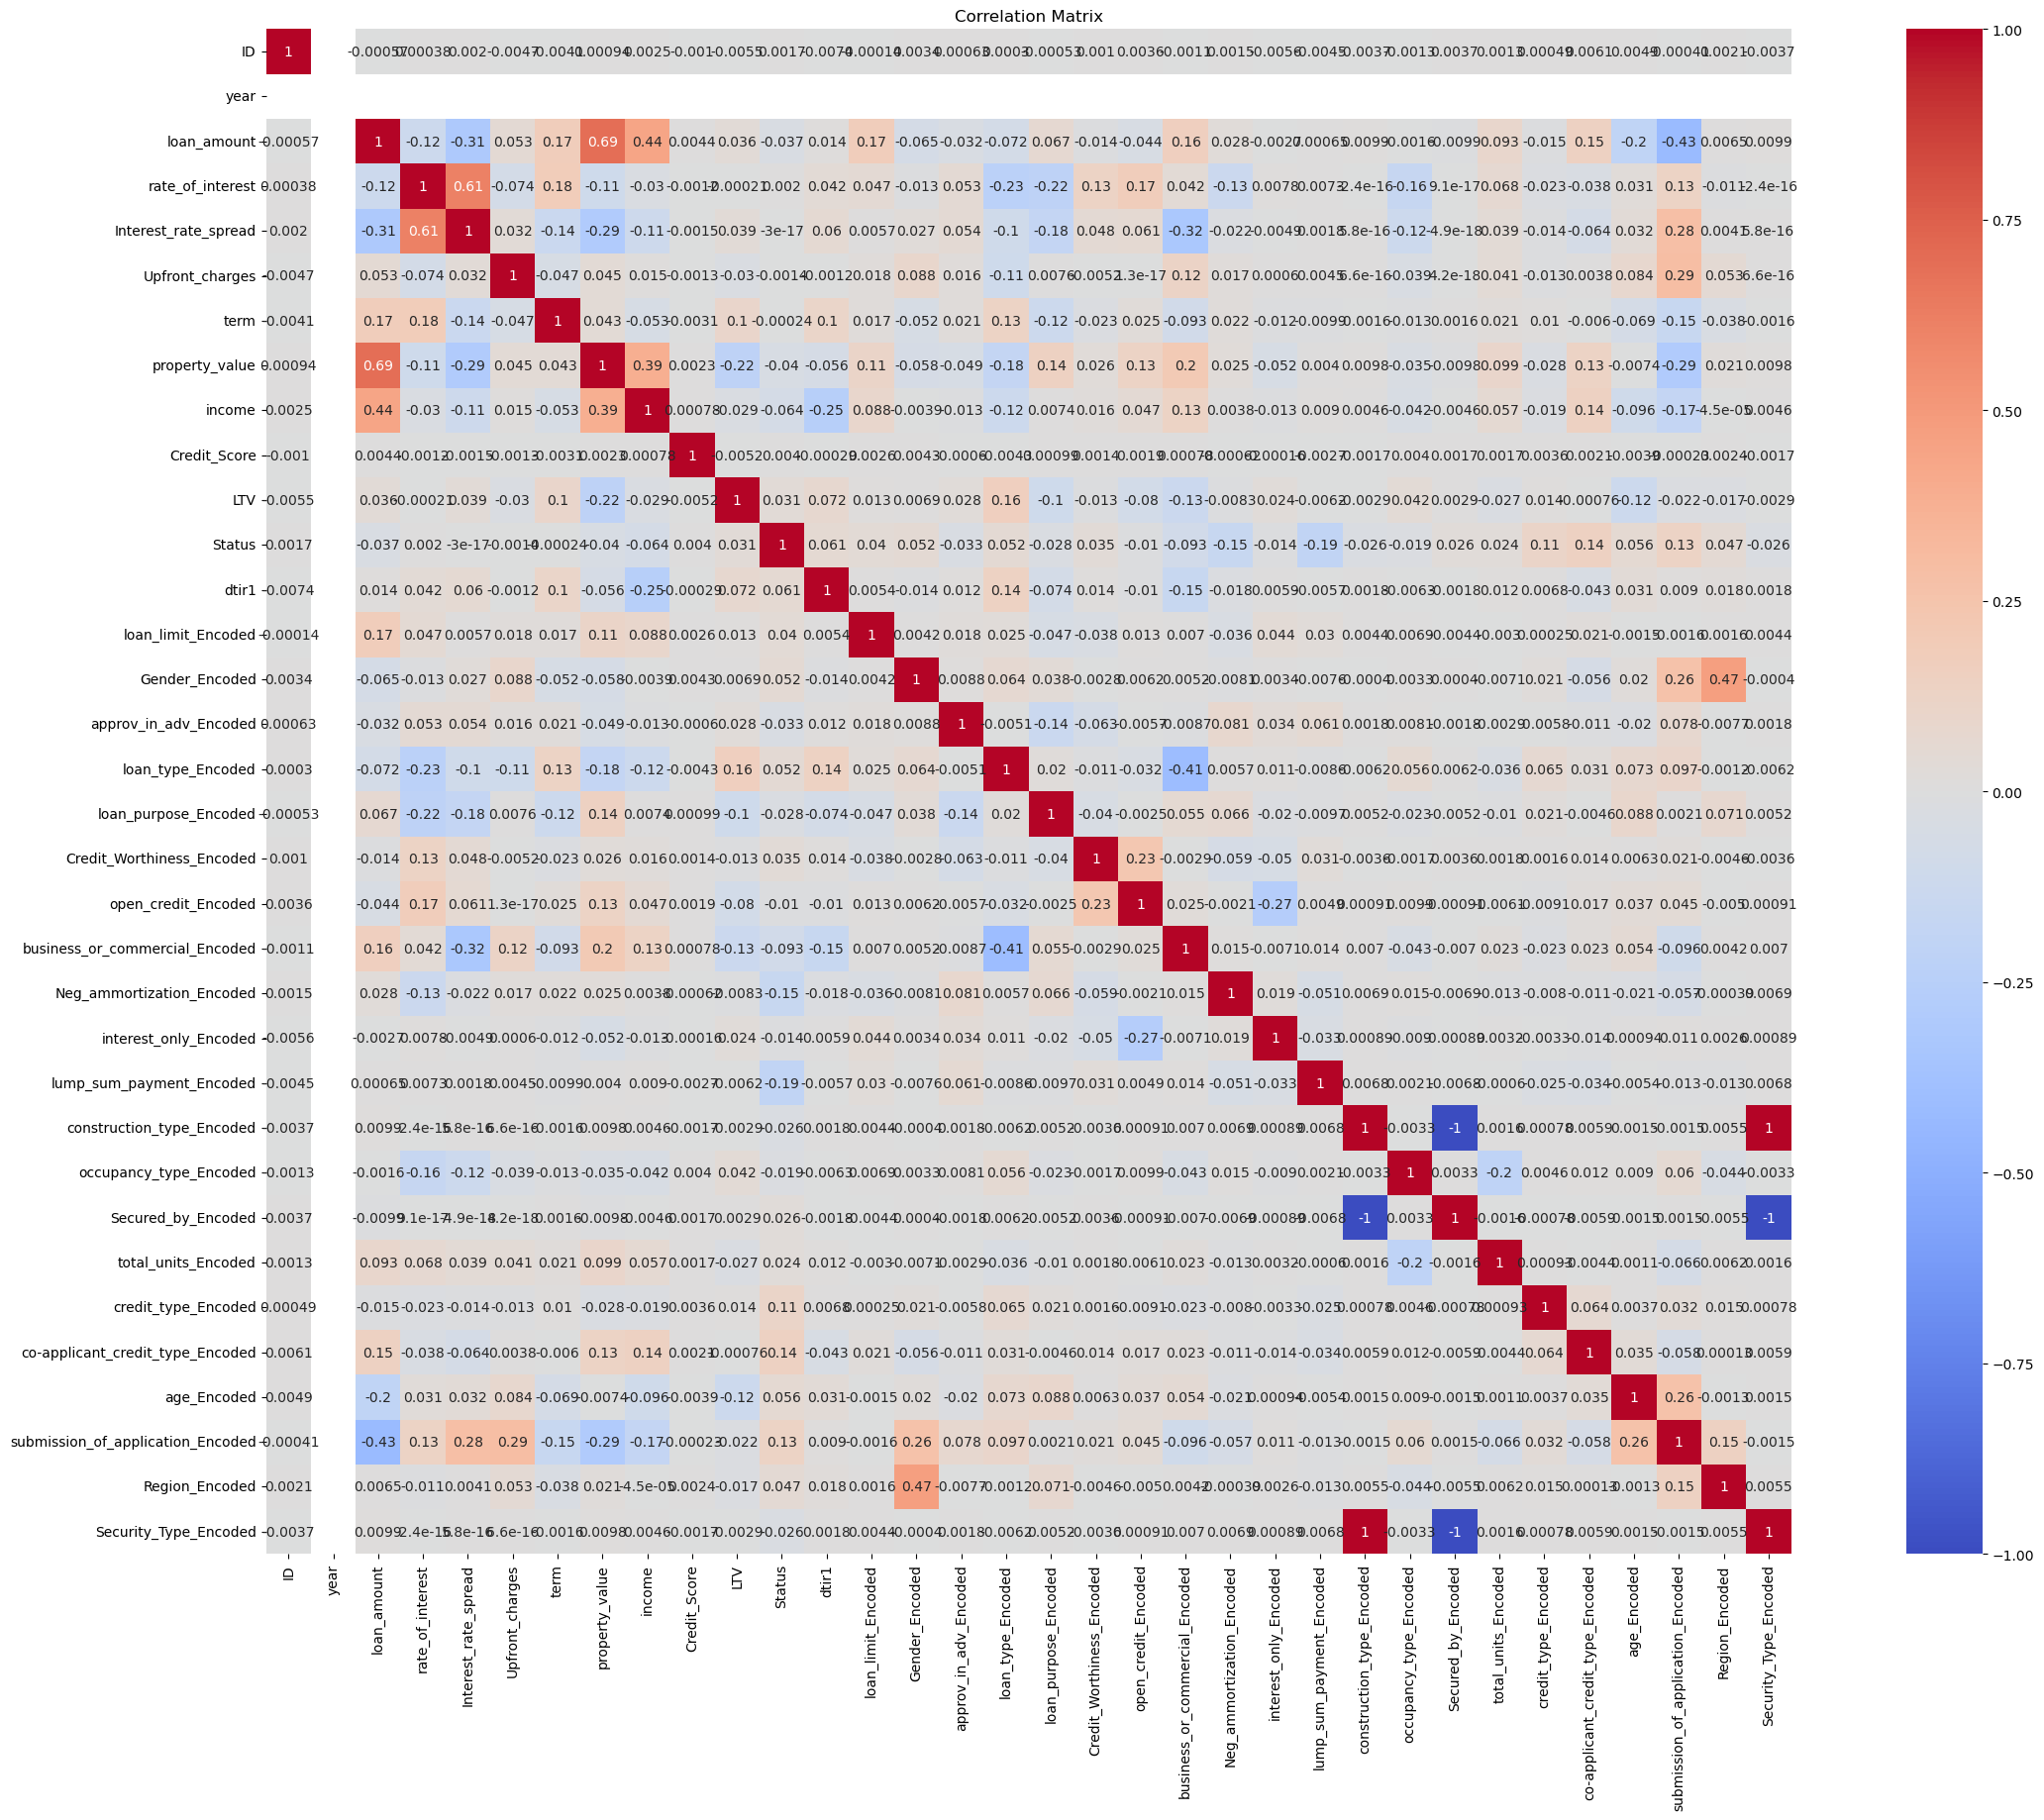

Selected features (F-regression):
income
business_or_commercial_Encoded
Neg_ammortization_Encoded
lump_sum_payment_Encoded
credit_type_Encoded
co-applicant_credit_type_Encoded
submission_of_application_Encoded


In [64]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Select the top k features based on correlation with the target variable
k = 7
selector = SelectKBest(f_regression, k=k)
selector.fit(df.drop('Status', axis=1), df['Status'])
support = selector.get_support()
features = df.drop('Status', axis=1).columns[support]

print('Selected features (F-regression):')
for feature in features:
    print(feature)

In [65]:
# Create a new DataFrame with the selected features
selected_features_df = df[features]

selected_features_df.head()


,income,business_or_commercial_Encoded,Neg_ammortization_Encoded,lump_sum_payment_Encoded,credit_type_Encoded,co-applicant_credit_type_Encoded,submission_of_application_Encoded
0,1740.0,1,1,1,3,0,1
1,4980.0,0,1,0,2,1,1
2,9480.0,1,0,1,3,0,1
3,11880.0,1,1,1,3,0,0
4,10440.0,1,1,1,1,1,0


In [66]:
selected_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   income                             148670 non-null  float64
 1   business_or_commercial_Encoded     148670 non-null  int32  
 2   Neg_ammortization_Encoded          148670 non-null  int32  
 3   lump_sum_payment_Encoded           148670 non-null  int32  
 4   credit_type_Encoded                148670 non-null  int32  
 5   co-applicant_credit_type_Encoded   148670 non-null  int32  
 6   submission_of_application_Encoded  148670 non-null  int32  
dtypes: float64(1), int32(6)
memory usage: 4.5 MB


<a id="num_statistics"></a>
# <span style='color:red'> Balancing Datasest Distribution </span></b>

In [67]:


# Split the data into features (X) and target (y)
X = df[features]
y = df['Status']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [68]:
from imblearn.under_sampling import RandomUnderSampler

# Split the data into features (X) and target (y)
X = df[features]
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)


# Fit and transform the training data
X_train_res, y_train_res = rus.fit_resample(X_train_scaled, y_train)

# Print the class distribution before and after undersampling
print("Class distribution before undersampling:")
print(y_train.value_counts())
print("Class distribution after undersampling:")
print(y_train_res.value_counts())


Class distribution before undersampling:
Status
0    89537
1    29399
Name: count, dtype: int64
Class distribution after undersampling:
Status
0    29399
1    29399
Name: count, dtype: int64


In [69]:
# Print the scaled data statistics
print("Scaled Training Data Statistics:")
print("Mean:", X_train_scaled.mean(axis=0))
print("Standard Deviation:", X_train_scaled.std(axis=0))

print("\nScaled Testing Data Statistics:")
print("Mean:", X_test_scaled.mean(axis=0))
print("Standard Deviation:", X_test_scaled.std(axis=0))

Scaled Training Data Statistics:
Mean: [-1.28324964e-16  8.45941106e-17  1.22291062e-16  2.08378713e-16
  5.50817585e-17 -9.91710619e-18  3.70397942e-17]
Standard Deviation: [1. 1. 1. 1. 1. 1. 1.]

Scaled Testing Data Statistics:
Mean: [-0.0108364  -0.01515952  0.00022128  0.01002652 -0.00168227 -0.0050111
 -0.00409515]
Standard Deviation: [0.83937656 1.01561861 0.99961843 0.9675655  0.99911211 0.99998862
 1.00233945]


<a id="num_statistics"></a>
# <span style='color:red'> Model Training</span></b>

In [19]:
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
#knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier()

In [20]:

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)



<a id="num_statistics"></a>
# <span style='color:red'> Model Evaluation </span></b>

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8338602273491625
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     22494
           1       0.70      0.56      0.62      7240

    accuracy                           0.83     29734
   macro avg       0.78      0.74      0.76     29734
weighted avg       0.83      0.83      0.83     29734

Confusion Matrix:
[[20721  1773]
 [ 3167  4073]]


Accuracy: 0.8338602273491625
Precision: 0.696715703044817
ROC-AUC: 0.7418740209175486


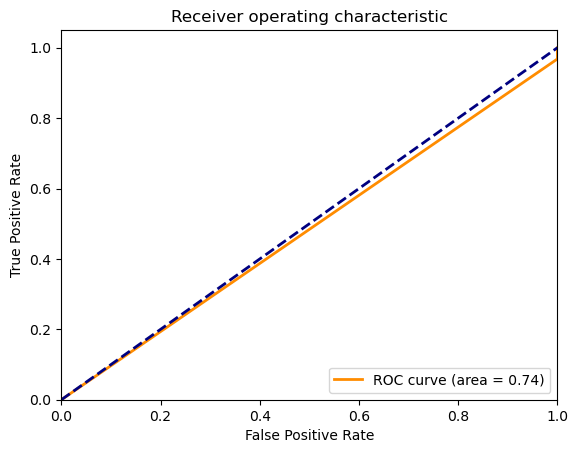

In [22]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



<a id="num_statistics"></a>
# <span style='color:red'> Download Model  </span></b>

In [23]:
import pickle

#store trained models
pickle.dump(knn, open('knn-model2.sav', 'wb'))


<a id="num_statistics"></a>
# <span style='color:red'> Model with Hyerparameter Tunning </span></b>

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for KNN
param_grid = {
    #'n_neighbors': [3, 5, 7, 9, 11],
    'n_neighbors': [201, 221, 241, 261, 301, 341],
    #'n_neighbors': [201, 221, 241, 261, 301, 341] - 75.3,
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [25]:

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV with the KNN model and hyperparameter grid
#grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
#grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
#grid_search = GridSearchCV(knn_model, param_grid, cv=None, scoring=None, n_jobs=None) - 65.9 , 21, uniform, auto , 41 - 66.8, 81 - 67, 201 - 68
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=None)
# Perform grid search on the training data
grid_search.fit(X_train_res, y_train_res)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Make predictions on the test set using the best model
y_pred2 = grid_search.best_estimator_.predict(X_test_scaled)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 201, 'weights': 'uniform'}
Best Accuracy: 0.7531378816515125


<a id="num_statistics"></a>
# <span style='color:red'> Model Evaluation </span></b>

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
roc_auc = roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test_scaled)[:,1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", roc_auc)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.8184233537364634
Precision: 0.6276168029945931
ROC-AUC: 0.8213400338309982
Confusion Matrix:
[[19808  2686]
 [ 2713  4527]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     22494
           1       0.63      0.63      0.63      7240

    accuracy                           0.82     29734
   macro avg       0.75      0.75      0.75     29734
weighted avg       0.82      0.82      0.82     29734



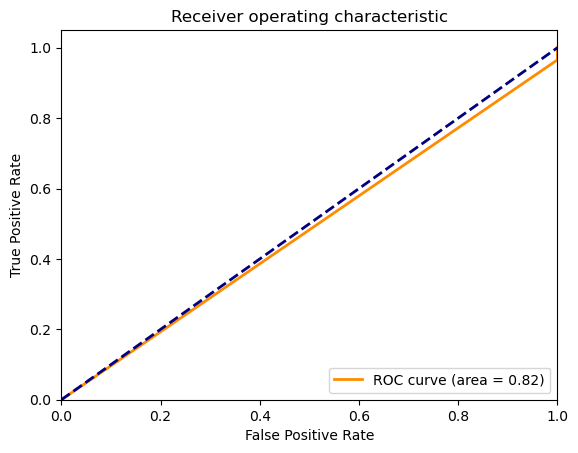

In [27]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,  grid_search.best_estimator_.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [28]:
import pickle

#store trained models
pickle.dump(grid_search, open('tuned_model2.sav', 'wb'))

In [29]:
import pickle

#store trained models
pickle.dump(knn_model, open('knn2.sav', 'wb'))